# Классификация

![qwe](../pics/Regression_vs_Classification.jpg)

* Предсказываем метку класса вместо непрерывной переменной

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [166]:
data = pd.read_csv('./data/train.csv')

In [167]:
X, y = data.drop(columns=['price_range']), data['price_range']

In [169]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=42)

In [171]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1500.0,1237.710000,438.924972,502.0,843.75,1224.5,1615.00,1998.0
blue,1500.0,0.499333,0.500166,0.0,0.00,0.0,1.00,1.0
clock_speed,1500.0,1.523067,0.820372,0.5,0.70,1.5,2.20,3.0
dual_sim,1500.0,0.505333,0.500138,0.0,0.00,1.0,1.00,1.0
fc,1500.0,4.301333,4.316513,0.0,1.00,3.0,7.00,19.0
four_g,1500.0,0.517333,0.499866,0.0,0.00,1.0,1.00,1.0
int_memory,1500.0,32.119333,18.229645,2.0,16.00,31.5,48.00,64.0
m_dep,1500.0,0.503867,0.289990,0.1,0.20,0.5,0.80,1.0
mobile_wt,1500.0,140.117333,35.399439,80.0,109.00,141.0,170.00,200.0
n_cores,1500.0,4.546667,2.288081,1.0,3.00,4.5,7.00,8.0


In [172]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [173]:
X_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>],
       [<Axes: title={'center': 'fc'}>,
        <Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>],
       [<Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>,
        <Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>],
       [<Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>,
        <Axes: title={'center': 'sc_w'}>],
       [<Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>]], dtype=object)

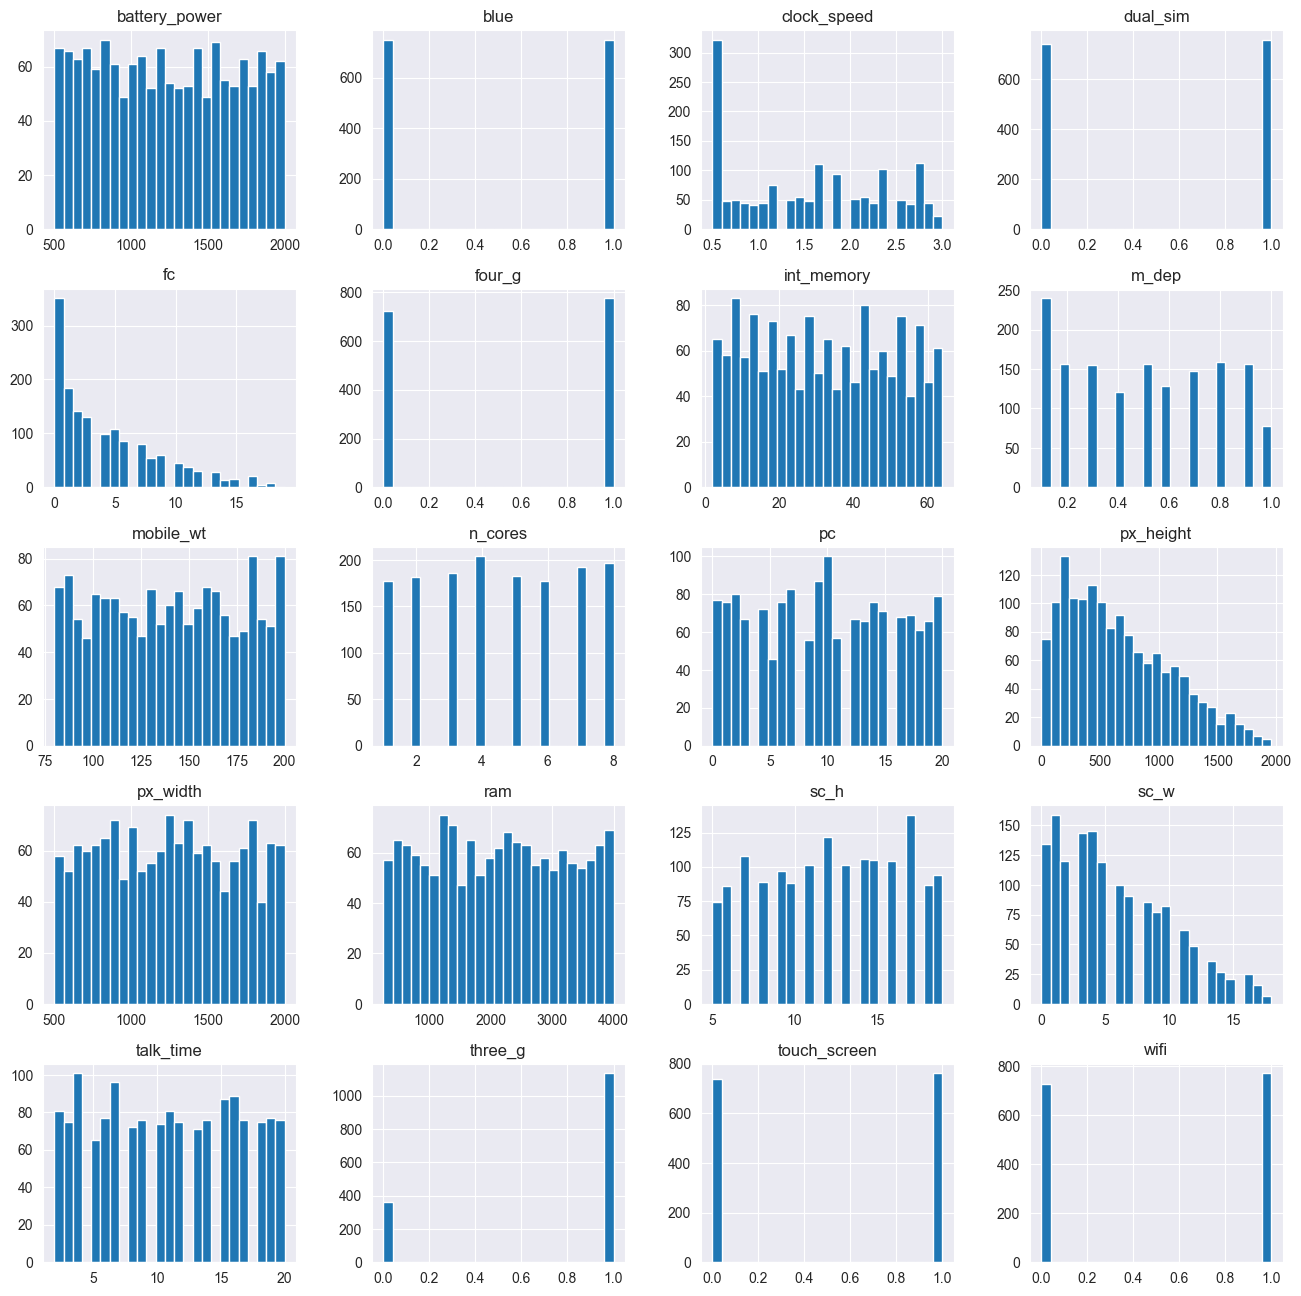

In [176]:
X_train.hist(bins=25, figsize=(16, 16))

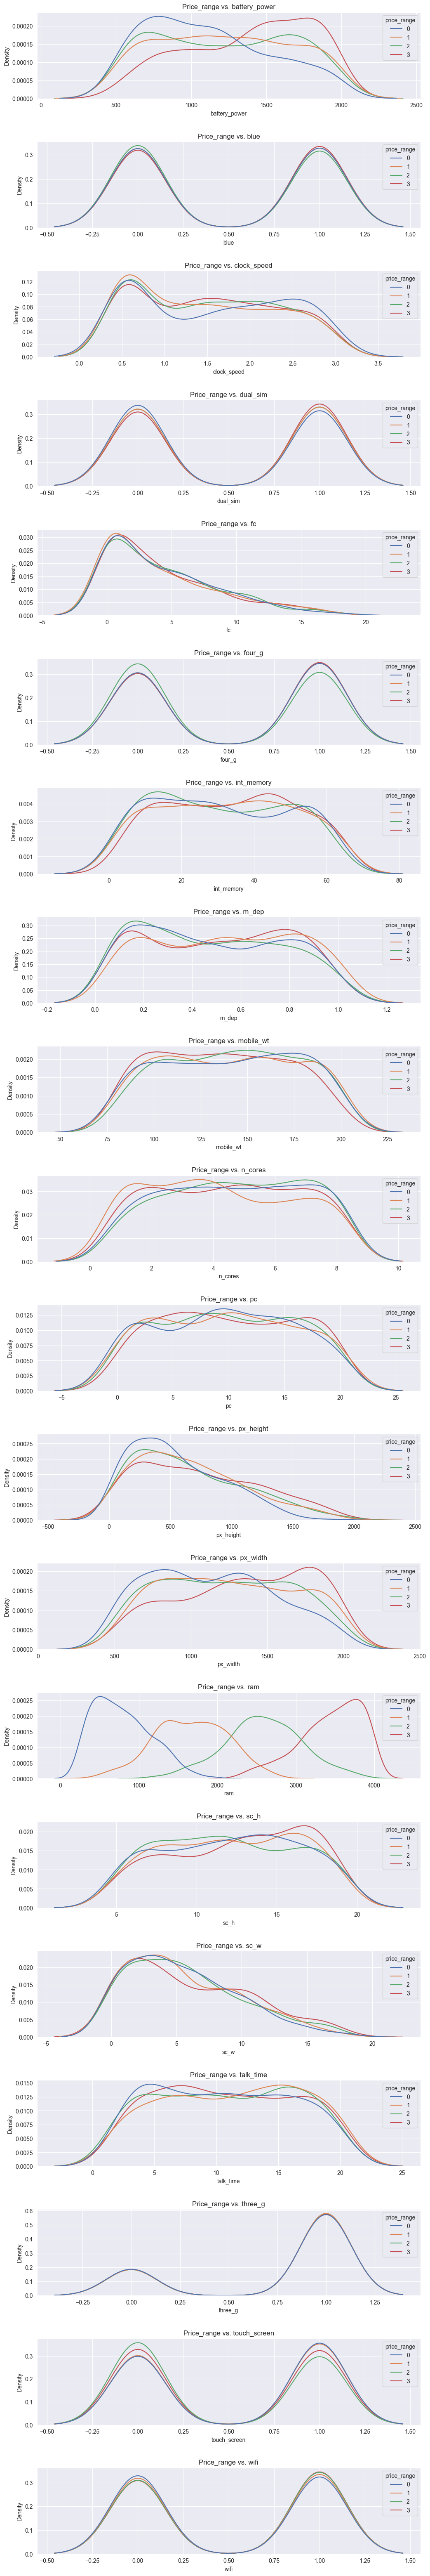

In [177]:
fig, axes = plt.subplots(X_train.shape[1], figsize=(12, 4 * X_train.shape[1]))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(X_train.columns):
    sns.kdeplot(X_train, x=col, hue=y_train, ax=axes[i], palette='deep')
    axes[i].set_title(f'Price_range vs. {col}')

<Axes: ylabel='Frequency'>

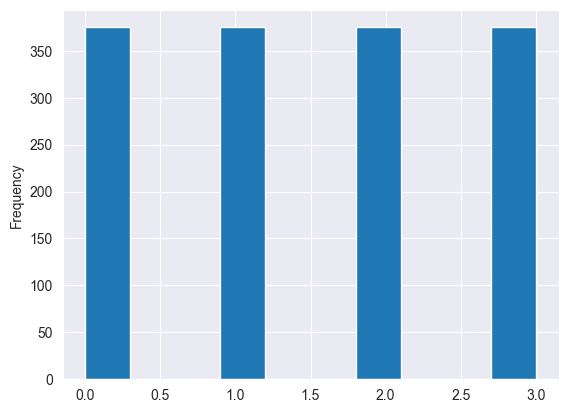

In [174]:
y_train.plot.hist()

In [175]:
y_train.value_counts()

price_range
2    375
3    375
1    375
0    375
Name: count, dtype: int64

In [179]:
X_train.corrwith(y_train).sort_values(ascending=False)

ram              0.916686
battery_power    0.203818
px_width         0.158391
px_height        0.141747
sc_w             0.053197
sc_h             0.037539
int_memory       0.035878
pc               0.029011
dual_sim         0.028623
wifi             0.024459
talk_time        0.009876
fc               0.003731
blue             0.002981
three_g          0.002088
m_dep            0.001851
n_cores         -0.001303
four_g          -0.009546
clock_speed     -0.011488
mobile_wt       -0.038604
touch_screen    -0.051287
dtype: float64

### Nominal features

In [214]:
X_train2 = X_train[['ram', 'px_width', 'px_height']]

array([[<Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'px_height'}>]], dtype=object)

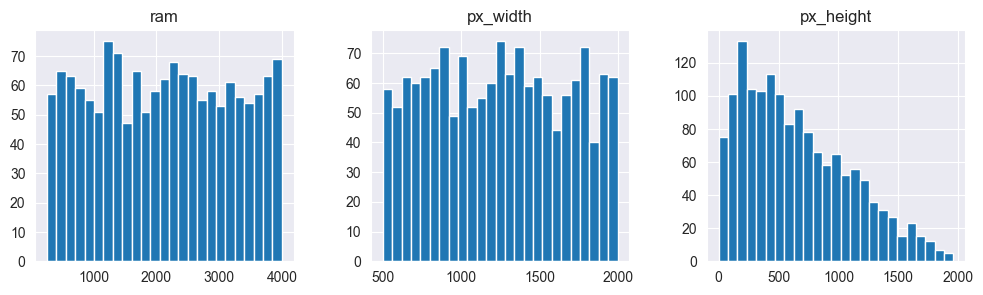

In [215]:
X_train2.hist(bins=25, figsize=(12, 3), layout=(1, 3))

<Axes: ylabel='Frequency'>

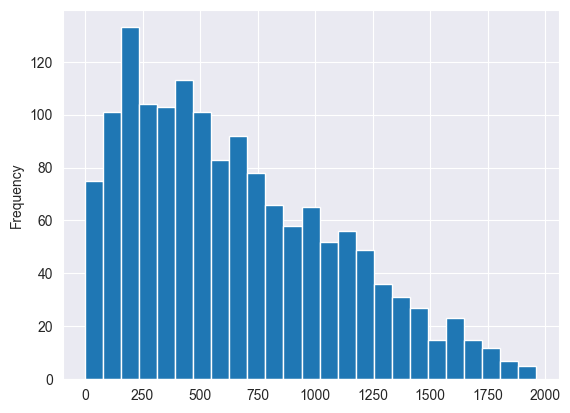

In [216]:
X_train2['px_height'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

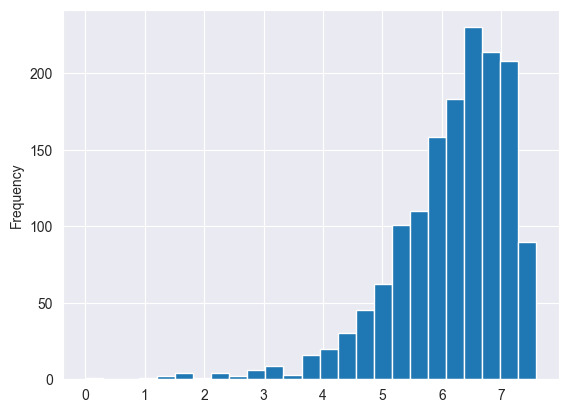

In [217]:
np.log1p(X_train2['px_height']).plot.hist(bins=25)

<Axes: ylabel='Count'>

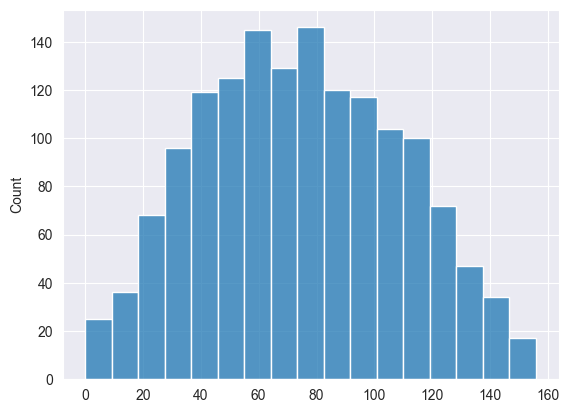

In [218]:
sns.histplot(stats.boxcox(X_train2['px_height']+1, lmbda=0.6))

In [219]:
X_train2['px_height'] = stats.boxcox(X_train2['px_height']+1, lmbda=0.6)

/var/folders/dv/l5yj1vt95y51qzyhmdns2cgw0000gn/T/ipykernel_26482/3879775823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train2['px_height'] = stats.boxcox(X_train2['px_height']+1, lmbda=0.6)


In [220]:
X_train_scaled = (X_train2 - X_train2.mean()) / X_train2.std()

In [221]:
proba_0 = proba_1 = proba_2 = proba_3 = 0.25

In [222]:
means = X_train_scaled.groupby(y_train).mean().T.values
stds = X_train_scaled.groupby(y_train).std().T.values

In [223]:
means

array([[-1.2278703 , -0.4211096 ,  0.42765333,  1.22132657],
       [-0.24427239,  0.03322535, -0.04174292,  0.25278996],
       [-0.20999951,  0.0237071 ,  0.00981756,  0.17647484]])

In [224]:
stds

array([[0.33557754, 0.42602531, 0.45694446, 0.36960235],
       [0.95441291, 0.99655655, 0.9841768 , 1.00430686],
       [0.89384965, 0.98589782, 1.00341217, 1.07429939]])

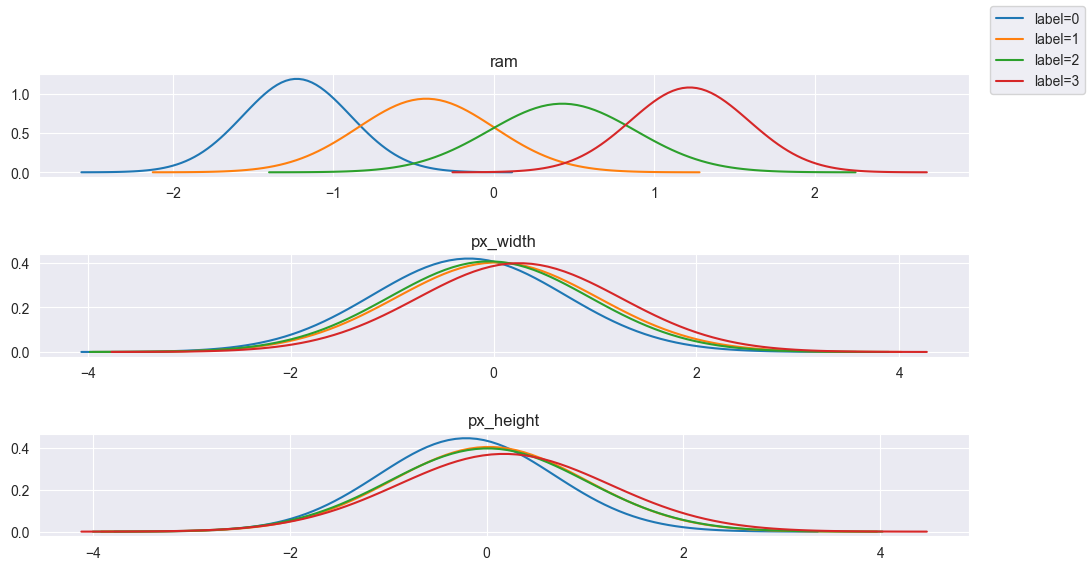

In [225]:
fig, axes = plt.subplots(nrows=X_train_scaled.shape[1], figsize=(12, 6))

for i, var in enumerate(X_train_scaled.columns):
    for class_label in sorted(y_train.unique()):
        mu = means[i, class_label]
        sigma = stds[i, class_label]
        x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
        axes[i].plot(x, stats.norm.pdf(x, mu, sigma), label=f'label={class_label}')
        axes[i].set_title(var)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels)
fig.subplots_adjust(hspace=0.75)

In [226]:
from sklearn.naive_bayes import GaussianNB

In [227]:
gnb = GaussianNB()

In [228]:
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [229]:
gnb.predict(X_train_scaled)

array([2, 3, 1, ..., 3, 1, 0])

In [230]:
predictions = []
data = X_train_scaled.head(25).values
for item in data:
    posteriors = []
    for class_label in sorted(y_train.unique()):
        posterior = (
            0.25 
            * stats.norm(loc=means[0, class_label], scale=stds[0, class_label]).pdf(item[0]) 
            * stats.norm(loc=means[1, class_label], scale=stds[1, class_label]).pdf(item[1]) 
            * stats.norm(loc=means[2, class_label], scale=stds[2, class_label]).pdf(item[2]) 
        )
        posteriors.append(posterior)
        print(f'Posterior score for class {class_label} is {posterior:.4e}')
    decision = np.argmax(posteriors)
    print(f'Decided class is {decision}\n\n')
    predictions.append(decision)

Posterior score for class 0 is 6.0826e-07
Posterior score for class 1 is 4.1204e-03
Posterior score for class 2 is 1.0829e-02
Posterior score for class 3 is 6.4030e-04
Decided class is 2


Posterior score for class 0 is 2.8889e-17
Posterior score for class 1 is 5.8849e-07
Posterior score for class 2 is 1.3598e-03
Posterior score for class 3 is 2.4274e-02
Decided class is 3


Posterior score for class 0 is 2.5114e-03
Posterior score for class 1 is 6.6414e-03
Posterior score for class 2 is 2.2071e-04
Posterior score for class 3 is 4.9699e-09
Decided class is 1


Posterior score for class 0 is 5.0375e-06
Posterior score for class 1 is 1.1729e-02
Posterior score for class 2 is 2.5972e-02
Posterior score for class 3 is 7.1630e-04
Decided class is 2


Posterior score for class 0 is 2.5984e-04
Posterior score for class 1 is 4.9562e-03
Posterior score for class 2 is 7.5763e-04
Posterior score for class 3 is 3.6161e-07
Decided class is 1


Posterior score for class 0 is 1.1634e-06
Posterior sco

In [231]:
gnb.predict(X_train_scaled.head(25))

array([2, 3, 1, 2, 1, 2, 3, 0, 0, 1, 1, 1, 2, 0, 3, 0, 1, 0, 0, 2, 0, 2,
       0, 3, 3])

In [232]:
np.array(predictions)

array([2, 3, 1, 2, 1, 2, 3, 0, 0, 1, 1, 1, 2, 0, 3, 0, 1, 0, 0, 2, 0, 2,
       0, 3, 3])

<Axes: >

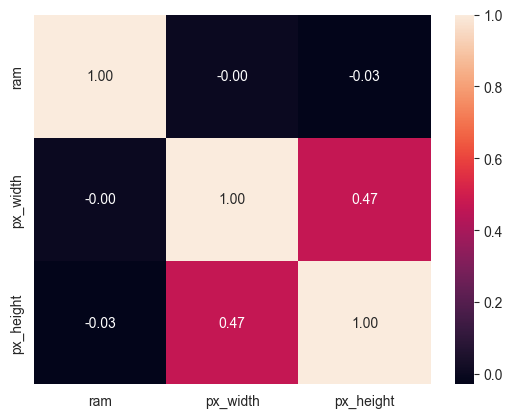

In [233]:
sns.heatmap(X_train_scaled.corr(), annot=True, fmt='.2f')

### Binary features

In [234]:
n_normal = 26
n_spam = 12

normal_counts = {
    'привет': 18,
    'здравствуйте': 12,
    'деньги': 4,
    'вечеринка': 2,
    'посылка': 6
}
spam_counts = {
    'привет': 3,
    'здравствуйте': 5, 
    'деньги': 10,
    'вечеринка': 0,
    'посылка': 1
}

In [235]:
p_prior_normal = n_normal / (n_normal + n_spam)
p_prior_spam = n_spam / (n_normal + n_spam)
print(p_prior_normal, p_prior_spam)

0.6842105263157895 0.3157894736842105


In [236]:
normal_probas = {k: v/sum(normal_counts.values()) for k, v in normal_counts.items()}
spam_probas = {k: v/sum(spam_counts.values()) for k, v in spam_counts.items()}

In [237]:
normal_probas

{'привет': 0.42857142857142855,
 'здравствуйте': 0.2857142857142857,
 'деньги': 0.09523809523809523,
 'вечеринка': 0.047619047619047616,
 'посылка': 0.14285714285714285}

In [238]:
spam_probas

{'привет': 0.15789473684210525,
 'здравствуйте': 0.2631578947368421,
 'деньги': 0.5263157894736842,
 'вечеринка': 0.0,
 'посылка': 0.05263157894736842}

In [245]:
msg = ['здравствуйте', 'деньги', 'деньги', 'деньги', 'деньги', 'деньги', 'деньги', 'посылка', 'вечеринка']

In [246]:
normal_posterior = p_prior_normal
spam_posterior = p_prior_spam
for word in msg:
    normal_posterior *= normal_probas[word]
    spam_posterior *= spam_probas[word]
    
print(f'Normal posterior = {normal_posterior:.4e}, Spam posterior = {spam_posterior:.4e}')

Normal posterior = 2.6079e-09, Spam posterior = 2.5412e-06


##### Add alpha

In [242]:
alpha = 1


normal_probas = {
    k: (v+alpha)/(sum(normal_counts.values()) + alpha*len(normal_counts)) 
    for k, v in normal_counts.items()
}

spam_probas = {
    k: (v+alpha)/(sum(spam_counts.values()) + alpha*len(spam_counts)) 
    for k, v in spam_counts.items()
}

In [243]:
normal_probas

{'привет': 0.40425531914893614,
 'здравствуйте': 0.2765957446808511,
 'деньги': 0.10638297872340426,
 'вечеринка': 0.06382978723404255,
 'посылка': 0.14893617021276595}

In [244]:
spam_probas

{'привет': 0.16666666666666666,
 'здравствуйте': 0.25,
 'деньги': 0.4583333333333333,
 'вечеринка': 0.041666666666666664,
 'посылка': 0.08333333333333333}

### Binary and nominal features

In [250]:
X_train_nominal = X_train.loc[
    y_train.isin([0, 1]), 
    ['ram', 'px_width', 'px_height']
]

X_test_nominal = X_test.loc[
    y_test.isin([0, 1]), 
    ['ram', 'px_width', 'px_height']
]


X_train_binary = X_train.loc[
    y_train.isin([0, 1]), 
    ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
]

X_test_binary = X_test.loc[
    y_test.isin([0, 1]), 
    ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
]


In [251]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [252]:
scaler = StandardScaler()

X_train_nominal_scaled = scaler.fit_transform(X_train_nominal)
X_test_nominal_scaled = scaler.transform(X_test_nominal)

In [253]:
gnb = GaussianNB()
gnb.fit(X_train_nominal_scaled, y_train[y_train.isin([0, 1])])

GaussianNB()

In [254]:
bnb = BernoulliNB()
bnb.fit(X_train_binary, y_train[y_train.isin([0, 1])])

BernoulliNB()

In [255]:
gaussian_probas = gnb.predict_proba(X_test_nominal_scaled)
bernoulli_probas = bnb.predict_proba(X_test_binary)
result_probas = gaussian_probas * bernoulli_probas

predictions = np.argmax(result_probas, axis=1)

In [259]:
predictions

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1])

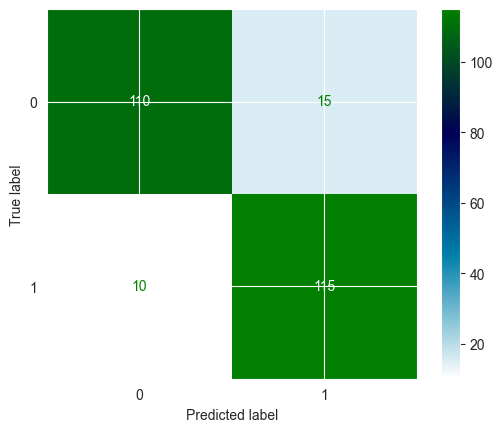

In [109]:
ConfusionMatrixDisplay.from_predictions(y_test[y_test.isin([0, 1])].values,  predictions, cmap='ocean_r')

![meme](../pics/file.dTiBun.png )


In [260]:
TP = 115
TN = 110
FP = 15
FN = 10

In [261]:
accuracy = (TP + TN) / (TP+FP+FN+TN)
accuracy

0.9

In [262]:
sensivity = recall = TP / (TP+FN)
sensivity 

0.92

In [263]:
specificity = TN / (TN+FP)
specificity

0.88

In [265]:
precision = TP / (TP+FP)
precision

0.8846153846153846

In [266]:
f1 = 2*precision*recall/(precision+recall)
f1

0.9019607843137256

In [268]:
# recall is considered β times as important as precision
beta = 0.5

fbeta = (1 + beta**2) * precision * recall / (beta ** 2 * precision + recall)
fbeta

0.8914728682170544

In [117]:
cohens_kappa = 2*(TP * TN - FN * FP) / ((TP + FP) * (FP + TN) + (TP + FN) * (FN + TN))
cohens_kappa

0.8

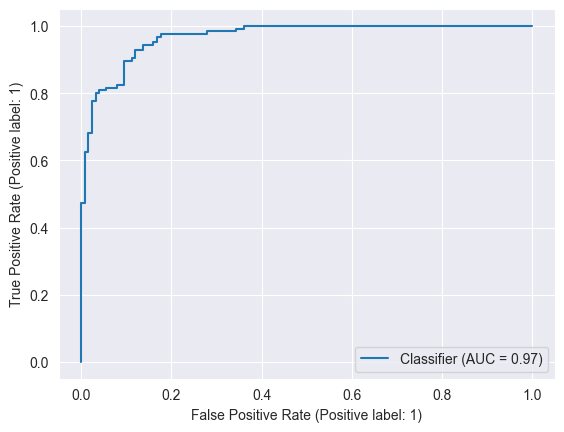

In [118]:
RocCurveDisplay.from_predictions(y_test[y_test.isin([0, 1])].values,  result_probas[:, 1],)

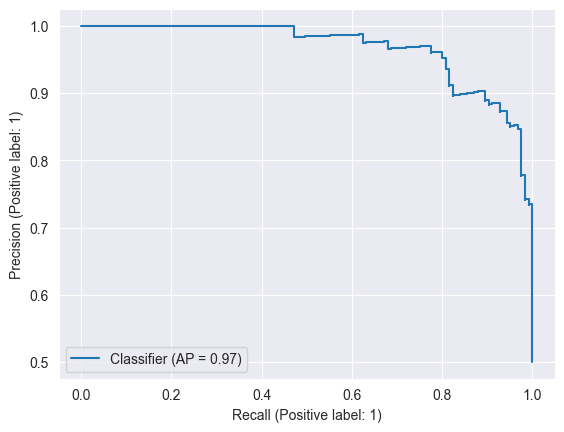

In [119]:
PrecisionRecallDisplay.from_predictions(y_test[y_test.isin([0, 1])].values,  result_probas[:, 1])

### Multiclass

In [120]:
X_train_nominal = X_train[['ram', 'px_width', 'px_height']]
X_test_nominal = X_test[['ram', 'px_width', 'px_height']]

X_train_binary = X_train[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']]
X_test_binary = X_test[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']]

In [121]:
scaler = StandardScaler()

X_train_nominal_scaled = scaler.fit_transform(X_train_nominal)
X_test_nominal_scaled = scaler.transform(X_test_nominal)

In [122]:
gnb = GaussianNB()
gnb.fit(X_train_nominal_scaled, y_train)

GaussianNB()

In [123]:
bnb = BernoulliNB()
bnb.fit(X_train_binary, y_train)

BernoulliNB()

In [124]:
gaussian_probas = gnb.predict_proba(X_test_nominal_scaled)
bernoulli_probas = bnb.predict_proba(X_test_binary)
result_probas = gaussian_probas * bernoulli_probas

predictions = np.argmax(result_probas, axis=1)

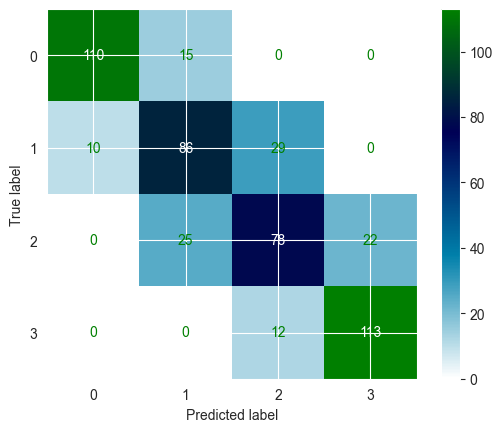

In [125]:
ConfusionMatrixDisplay.from_predictions(y_test,  predictions, cmap='ocean_r')

In [126]:
sensivity_0 = 110 / (110 + 15+0+0) 
specificity_0 = (86+29+0+25+78+22+0+12+113) / (86+29+0+25+78+22+0+12+113 + 10+0+0)
sensivity_0, specificity_0

(0.88, 0.9733333333333334)

In [127]:
sensivity_1 = 86 / (86 + 10+29+0) 
specificity_1 = (110+0+0+0+78+22+0+12+113) / (110+0+0+0+78+22+0+12+113 + 15+25+0)
sensivity_1, specificity_1

(0.688, 0.8933333333333333)

In [128]:
sensivity_2 = 78 / (78 + 0+25+22) 
specificity_2 = (110+15+0+10+86+0+0+0+113) / (110+15+0+10+86+0+0+0+113 + 0+29+12)
sensivity_2, specificity_2

(0.624, 0.8906666666666667)

In [129]:
sensivity_3 = 113 / (113 + 0+0+12) 
specificity_3 = (110+15+0+10+86+29+0+25+78) / (110+15+0+10+86+29+0+25+78 + 0+0+22)
sensivity_3, specificity_3

(0.904, 0.9413333333333334)

In [130]:
#Macro
(0.88 + 0.688 + 0.624 + 0.904)/4

0.774

In [131]:
#Weighted
(0.88 * 0.25) + (0.688 * 0.25) + (0.624 * 0.25) + (0.904 * 0.25)

0.774

In [132]:
# Micro
(110 + 86 + 78 + 113) / ((110 + 15+0+0) + (86 + 10+29+0) + (78 + 0+25+22) + (113 + 0+0+12))

0.774

In [133]:
y_test.value_counts()

price_range
2    125
0    125
3    125
1    125
Name: count, dtype: int64

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import cohen_kappa_score, f1_score, fbeta_score
from sklearn.metrics import roc_auc_score

In [101]:
recall_score(y_test.values, predictions, average='weighted')

0.774

In [186]:
recall_score(y_test.values, predictions, average='micro')

0.774

In [45]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

In [46]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [47]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [49]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.4, 
                                                    random_state=42)

In [51]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', GaussianNB())
])

In [52]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('clf', GaussianNB())])

In [53]:
preds = pipe.predict(X_test)

In [54]:
print('Precision macro', precision_score(y_test, preds, average='macro'))
print('Precision weighted', precision_score(y_test, preds, average='weighted'))
print('Precision micro', precision_score(y_test, preds, average='micro'))
print()
print('Recall macro', recall_score(y_test, preds, average='macro'))
print('Recall weighted', recall_score(y_test, preds, average='weighted'))
print('Recall micro', recall_score(y_test, preds, average='micro'))
print()
print('F1 macro', f1_score(y_test, preds, average='macro'))
print('F1 weighted', f1_score(y_test, preds, average='weighted'))
print('F1 micro', f1_score(y_test, preds, average='micro'))

Precision macro 0.9632850241545894
Precision weighted 0.9586553945249597
Precision micro 0.9583333333333334

Recall macro 0.960727969348659
Recall weighted 0.9583333333333334
Recall micro 0.9583333333333334

F1 macro 0.9617742517129463
F1 weighted 0.9582431782666185
F1 micro 0.9583333333333334
